In [46]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [47]:
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

fatal: destination path 'deeplearning' already exists and is not an empty directory.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [48]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))


89 23


In [49]:
def create_dataset(dataset, look_back):
  x_data = []
  y_data = []
  for i in range(len(dataset)-look_back):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

In [50]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(86, 3) (86,)
(20, 3) (20,)


In [51]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(X_train.shape)
print(X_test.shape)

(86, 1, 3)
(20, 1, 3)


In [52]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 1ms/step - loss: 0.2284
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 4/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 5/100
86/86 [==============================] - 0s 962us/step - loss: 0.0060
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 7/100
86/86 [==============================] - 0s 988us/step - loss: 0.0018
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 9.4407e-04
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 8.3521e-04
Epoch 11/100
86/86 [==============================] - 0s 1ms/step - loss: 7.9714e-04
Epoch 12/100
86/86 [==============================] - 0s 1ms/step - loss: 7.7769e-04
Epoch 13/100
86/8

In [54]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])
print(len(testPredict))

20


In [55]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 284.01 RMSE
Test Score: 325.02 RMSE


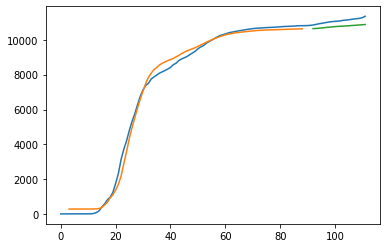

In [56]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 새 섹션